In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X dimension (100, 2)
Y dimension (100, 1)


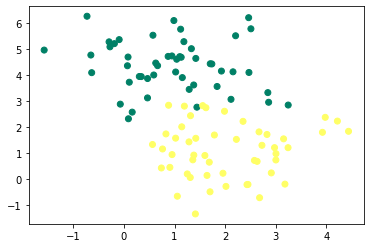

In [5]:
X , y = make_blobs(n_samples=100 , n_features=2 , centers=2 ,random_state=0)
y = y.reshape((y.shape[0],1))

print('X dimension',X.shape)
print('Y dimension',y.shape)

plt.scatter(X[:,0],X[:,1],c=y, cmap ='summer')


In [6]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

In [12]:
def model(X,W,b):
    Z = X.dot(W) + b
    A = 1/ (1+np.exp(-Z))
    return A

In [13]:
A = model(X,W,b)

In [14]:
A.shape

(100, 1)

In [15]:
def log_loss(A,y):
    m = len(y)
    return 1/m * np.sum(-y * np.log(A)-(1-y)*np.log(1-A))

In [17]:
log_loss(A,y)

5.100972643513434

In [18]:
def gradients(A,X,y):
    dW= 1/len(y) * np.dot(X.T,A-y)
    db = 1/len(y) * np.sum(A-y)
    return (dW , db)

In [20]:
def update(dW,db,W,b,learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W,b)

In [31]:
from sklearn.metrics import accuracy_score

In [34]:
def ANN(X,y,learning_rate = 0.1,n_iteration =100):
    #initialisation W,b
    W,b = initialisation(X)
    loss = []
    
    for i in range(n_iteration):
        A = model(X,W,b)
        loss.append(log_loss(A,y))
        dW, db = gradients(A,X,y)
        W ,b = update(dW,db,W,b,learning_rate)
    
    y_pred = predict(X,W,b)
    print(accuracy_score(y,y_pred))
    
    plt.plot(loss)
    plt.show()
    
    return (W,b)

0.92


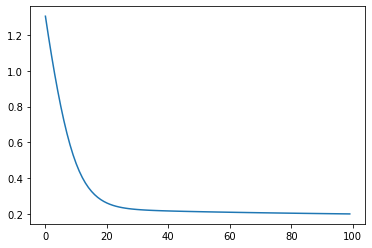

(array([[ 1.12079857],
        [-1.24598264]]),
 array([1.2879978]))

In [35]:
ANN(X,y)

In [30]:
def predict(X,W,b):
    A = model(X,W,b)
    return A >=0.5

array([ True])

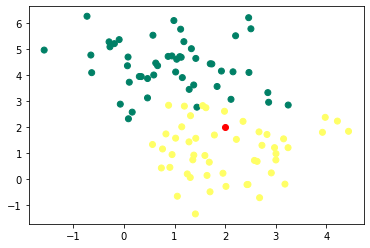

In [38]:
new_plant = np.array([2,1])
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(new_plant[0],new_plant[0],c='r')
predict(new_plant,W,b)